# EDA y procesamiento de datos

## Librerías básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


## Lectura de datos

Datos disponibles [aquí](https://www.kaggle.com/code/ravaliraj/risk-classification-of-cervical-cancer)

De la documentación de la base de datos sabemos que todas las columnas tienen datos numéricos, pero el archivo los tiene codificados como strings, se hará desde el comienzo ese cambio. Al hacer este paso también convertimos a valores nulos los valores que estaban codificados nulos con el caracter `?`.

In [2]:
df = pd.read_csv('../data/kag_risk_factors_cervical_cancer.csv')
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')
df.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.shape


(858, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

## Tratamiento de valores nulos

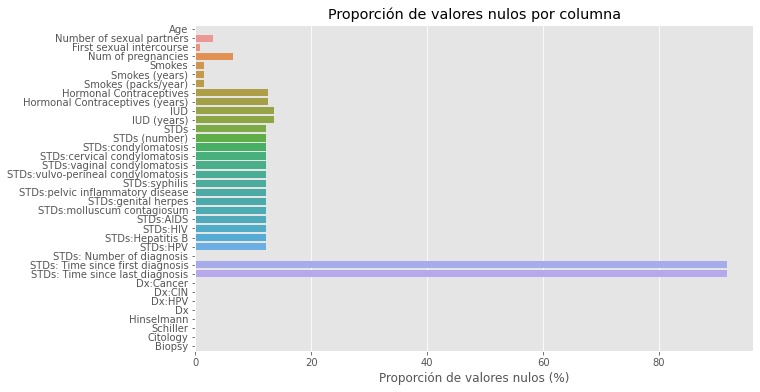

In [5]:
# df.replace('?', np.nan, inplace=True)
null_props = df.isna().sum() / df.shape[0] * 100
plt.figure(figsize=(10, 6))
plt.title('Proporción de valores nulos por columna')
sns.barplot(x=null_props.values, y=null_props.index);
plt.xlabel('Proporción de valores nulos (%)');


In [6]:
df.dropna(thresh=len(df) * 0.2, axis=1, inplace=True)


En las demás columnas podemos imputar un valor apropiado, sea la mediana o la moda. En este caso optaremos por usar la mediana, ya que suele afectar menos la distribución original de los datos.

In [7]:
df.fillna(df.median(), inplace=True)


## Matriz de correlaciones

> Solo se toman en cuenta aquellas variables que sí tienen un sentido numérico.

In [8]:
for column in df.columns:
    print(df[column].describe())

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64
count    858.000000
mean       2.511655
std        1.644759
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64
count    858.000000
mean      16.995338
std        2.791883
min       10.000000
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64
count    858.000000
mean       2.257576
std        1.400981
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64
count    858.000000
mean       0.143357
std        0.350641
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Smokes, dtype: float64
count    

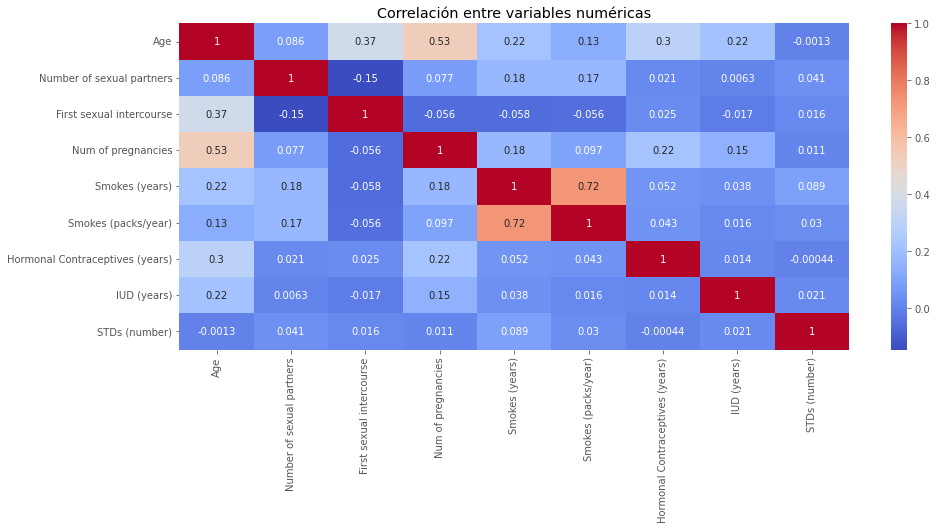

In [9]:
plt.figure(figsize=(15, 6))
numeric_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');
plt.title('Correlación entre variables numéricas');


La gran mayoría de las variables no tienen una alta correlación, sugiriendo que hay algo de independencia entre ellas. Sin embargo salta a la vista el caso de las variables `Smokes (years)` y `Smokes (packs/year)`; es de esperarse que un aumento en una de estas implique un aumento en la otra, así que esta columna deberá ser eliminada.


In [10]:
# df.drop('Smokes', axis=1, inplace=True)
# df.drop('Smokes (packs/year)', axis=1, inplace=True)
df.drop('Hormonal Contraceptives', axis=1, inplace=True)
df.drop('IUD', axis=1, inplace=True)
df.drop('Dx', axis=1, inplace=True)


## Distribución de edades


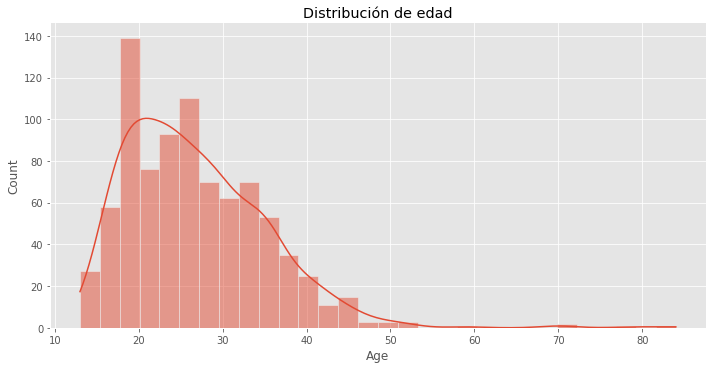

In [11]:
sns.displot(df['Age'], bins=30, kde=True, aspect=2);
plt.title('Distribución de edad');


Después de conocer la distribución de la edad de las mujeres en esta base de datos, podemos proceder a investigar cómo se comporta esta misma distribución tomando en cuenta las posibles pruebas que detectan el cáncer de cuello uterino.

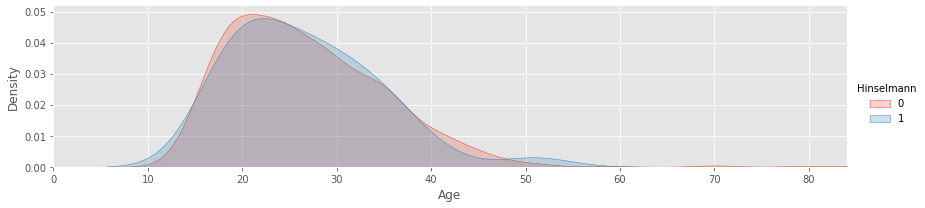

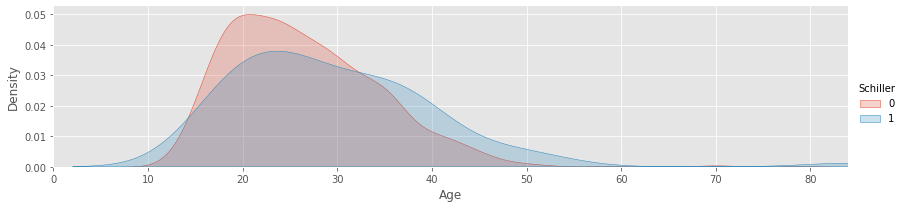

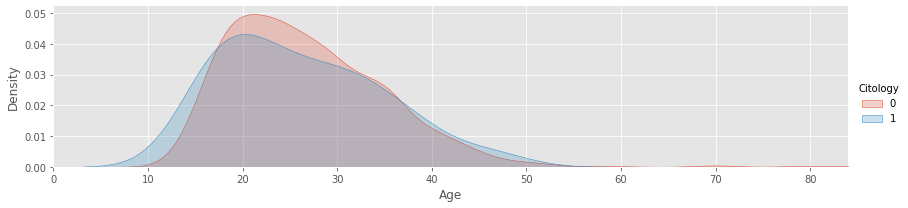

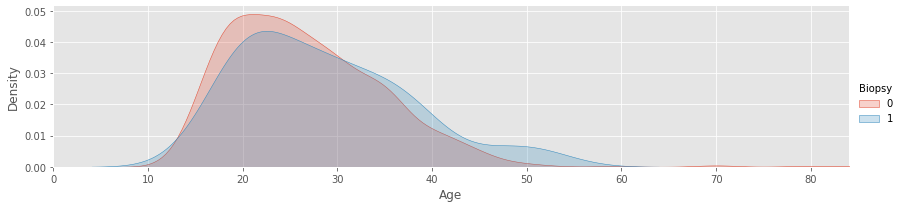

In [12]:
tests = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
for feature in tests:
    figure = sns.FacetGrid(df, hue=feature, aspect=4)
    figure.map(sns.kdeplot, 'Age', shade=True);
    figure.set(xlim=(0, df['Age'].max()))
    figure.add_legend();
    

## Variable a predecir

En esta base de datos no se tiene una sola variable objetivo, sino que hay 4 variables que indican si se encontró un cáncer o no, estas variables son 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'. Podemos crear una nueva variable objetivo que represente una pseudo probabilidad de encontrar cáncer. Sin más información de la base de datos, proponemos que esta variable sea simplemente la suma de estas 4 variables.

In [13]:
df['Cancer'] = df['Hinselmann'] + df['Schiller'] + df['Citology'] + df['Biopsy']
df.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1, inplace=True)


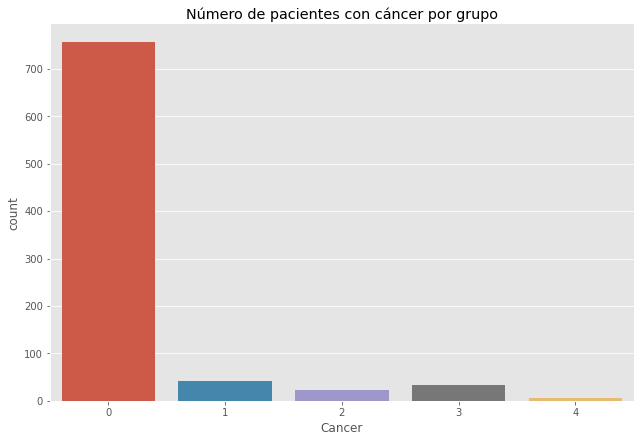

In [14]:
sns.catplot(x='Cancer', kind='count', data=df, height=6, aspect=1.5);
plt.title('Número de pacientes con cáncer por grupo');


Cuando entrenemos a los modelos tendremos que compensar este desbalance en los datos. De momento consideramos 2 opciones posibles:
- Creación de datos artificiales usando algún algoritmo de ML como KNN
- Proporcionar un peso a cada clase al modelo que entrenemos

In [15]:
df.to_csv('../data/clean_data.csv', index=False)
